*********************************************************************
Logistic Regression on diabetes dataset after Scaling features using normalization
************************************************************************

In [17]:
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split 

from sklearn import metrics 

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [18]:
dp = r"C:\Users\anany\Downloads\archive (2)\diabetes.csv"
df = pd.read_csv(dp)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
X=df.drop(['Outcome'], axis=1)
y=df['Outcome']

In [20]:
scale = MinMaxScaler()
scale.fit_transform(X)


array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

C:\Users\anany\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = lreg.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
from sklearn import metrics 

In [24]:
score = lreg.score(X_train, y_train)
score

0.7708333333333334

In [25]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.7916666666666666

In [26]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.047146401985111774

In [27]:
precision = metrics.precision_score(y_test, y_pred)
precision

0.7115384615384616

In [28]:

recall = metrics.recall_score(y_test, y_pred)
recall

0.5967741935483871

In [29]:
f1 = metrics.f1_score(y_pred, y_test, average="weighted")
f1

0.7969460688758935

In [30]:
labels = ["Not Diabetic", "Diabetic"]
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
cnf_matrix 

array([[115,  15],
       [ 25,  37]], dtype=int64)

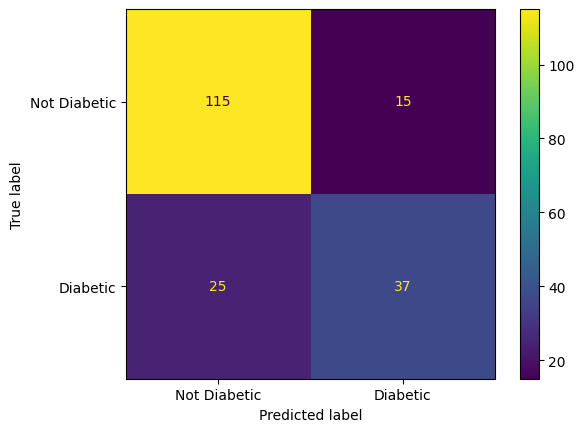

In [31]:
metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=labels).plot()